In [62]:
import h5py
import numpy as np
from scipy.signal import butter, filtfilt, find_peaks

# Load the .mat file
file_path = 'Group7_ECG.mat'
with h5py.File(file_path, 'r') as mat_file:
    ecg_array = np.array(mat_file['y'])

In [52]:
print(ecg_array[:5, :])

[[ 0.00000000e+00 -1.16341957e+02 -8.24717484e+01 -1.27118271e+02]
 [ 3.90625000e-03  1.06496758e+02 -9.22375098e+03 -7.66658545e+03]
 [ 7.81250000e-03 -2.80737134e+03 -6.70080566e+03  4.31451202e+02]
 [ 1.17187500e-02 -2.91408789e+03 -1.03772500e+04 -1.99798657e+03]
 [ 1.56250000e-02 -2.89019385e+03 -1.11691230e+04 -1.50359070e+03]]


In [53]:
for i in range(ecg_array.shape[1]):
    print(f"Column {i}: Mean = {np.mean(ecg_array[:, i]):.2f}, Std = {np.std(ecg_array[:, i]):.2f}")

Column 0: Mean = 72.39, Std = 41.80
Column 1: Mean = -1746.11, Std = 1013.43
Column 2: Mean = -8987.56, Std = 1711.85
Column 3: Mean = 1021.48, Std = 1084.01


In [54]:
# bandpass filter
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

In [63]:
# Load PPG data
ppg_file_path = 'Group7_PPG.mat'
with h5py.File(ppg_file_path, 'r') as ppg_file:
    ppg_data = np.array(ppg_file['y'])

In [64]:
# Extract time and signals
ecg_time = ecg_array[:, 0]  # Time
ecg_signal = ecg_array[:, 1]  # ECG signal
ppg_time = ppg_data[:, 0]  # Time
ppg_signal = ppg_data[:, 2]  # PPG signal

In [65]:
min_length = min(len(ecg_time), len(ppg_time))
merged_time = ecg_time[:min_length]  # Use the shorter time array
ecg_signal = ecg_signal[:min_length]
ppg_signal = ppg_signal[:min_length]

fs = 256  # 256Hz
lowcut = 0.5
highcut = 10
filtered_ecg_signal = bandpass_filter(ecg_signal, lowcut, highcut, fs)

# R-peaks in the ECG signal
ecg_peaks, _ = find_peaks(filtered_ecg_signal, distance=fs /4)

# peaks in the PPG signal
ppg_peaks, _ = find_peaks(ppg_signal, distance=fs /4)

**PTT: ECG Vs Resting PPG**

In [ ]:
# Calculate PTT values
ptt_values = []
for r_peak in ecg_peaks:
    ppg_after_r = ppg_peaks[ppg_peaks > r_peak]  # Find the first PPG peak after the R-peak
    if len(ppg_after_r) > 0:
        ptt = merged_time[ppg_after_r[0]] - merged_time[r_peak] #calculate ptt
        ptt_values.append(ptt)

ptt_values = np.array(ptt_values)

average_ptt = np.mean(ptt_values)
std_ptt = np.std(ptt_values)

In [66]:
print(f"Average PTT: {average_ptt:.3f} seconds")
print(f"Standard Deviation of PTT: {std_ptt:.3f} seconds")

Average PTT: 0.173 seconds
Standard Deviation of PTT: 0.109 seconds


**PTT: ECG vs Sport PPG**

In [59]:
print(f"Average PTT: {average_ptt:.3f} seconds")
print(f"Standard Deviation of PTT: {std_ptt:.3f} seconds")

Average PTT: 0.187 seconds
Standard Deviation of PTT: 0.106 seconds


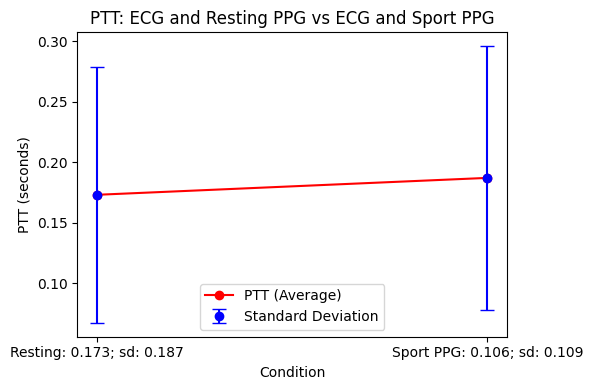

In [68]:
import matplotlib.pyplot as plt


categories = ['Resting: 0.173; sd: 0.187', 'Sport PPG: 0.106; sd: 0.109']
means = [0.173, 0.187]
std_devs = [0.106, 0.109]

plt.figure(figsize=(6, 4))
plt.plot(categories, means, marker='o', linestyle='-', color='red', label='PTT (Average)')
plt.errorbar(categories, means, yerr=std_devs, fmt='o', color='blue', capsize=5, label='Standard Deviation')

plt.title('PTT: ECG and Resting PPG vs ECG and Sport PPG')
plt.ylabel('PTT (seconds)')
plt.xlabel('Condition')


plt.legend()
plt.tight_layout()
plt.show()
